# Load libraries

In [0]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras import backend as K
from google.colab import files
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras import models
from keras import layers
from keras import optimizers

# Cifar10 Dataset

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [25]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [26]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


In [0]:
# Helper function to plot some images in the dataset
def plot_cifar10(class_name=None):
  mapping = {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4,
            'dog': 5, 'fog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
  
  if class_name == None:
    fig, ax = plt.subplots(10, 10, sharey=True, figsize=(11,10))
    for j in range(10):
      class_index = (y_train == j)[:,0]
      class_imgs = x_train[class_index,:,:][np.random.choice(5000, 10),:,:]
      for i, img in enumerate(class_imgs):
        ax[j,i].imshow(img)
        ax[j,i].grid('off')
        ax[j,i].set_xticks([])
        ax[j,i].set_yticks([])
        if i == 0:
          ax[j,i].set_ylabel(list(mapping.keys())[j])
  else:
    class_index = (y_train == mapping[class_name])[:,0]
    class_imgs = x_train[class_index,:,:][np.random.choice(5000, 10),:,:]
    fig, ax = plt.subplots(1, 10, sharey=True, figsize=(22,2))
    for i, img in enumerate(class_imgs):
      ax[i].imshow(img)
      ax[i].grid('off')
      ax[i].set_xticks([])
      ax[i].set_yticks([])
      if i == 0:
        ax[i].set_ylabel(class_name)
  
  

## Display some random images 

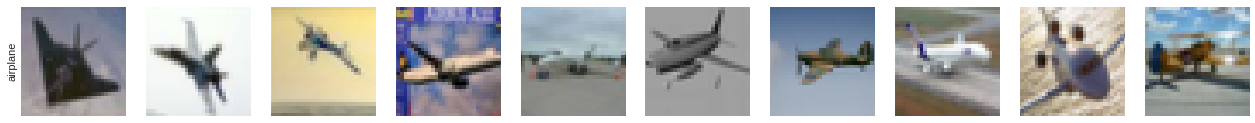

In [28]:
plot_cifar10('airplane')

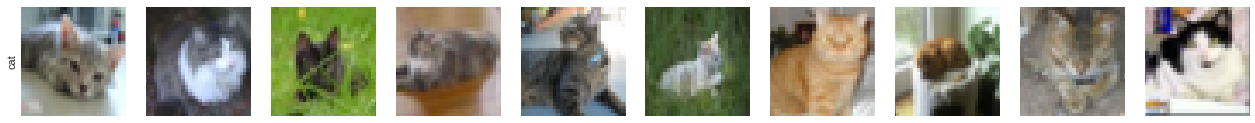

In [29]:
plot_cifar10('cat')

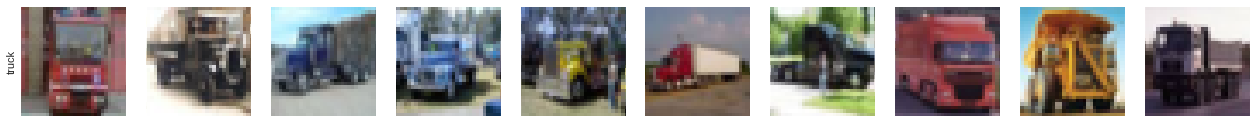

In [30]:
plot_cifar10('truck')

## Display 10 random images from each class

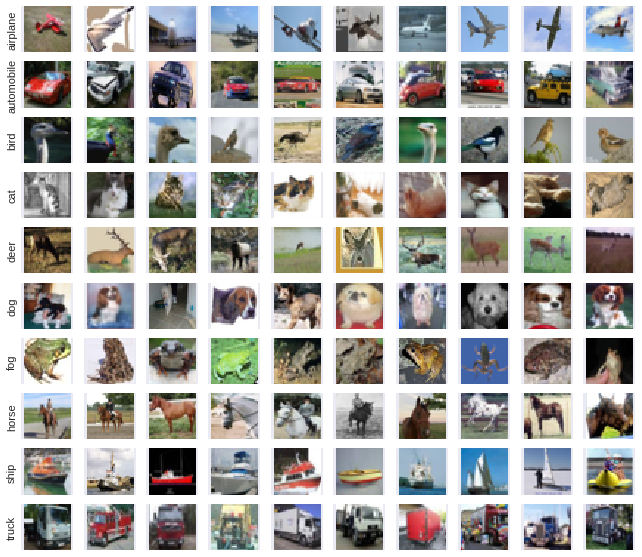

In [31]:
plot_cifar10()

# Train a two-layes neural network

## Build a neural network with Keras layers

In [0]:
# 2-layers NN
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=32 * 32 * 3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Configure the optimizer
rmsprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Preprocessing data 

In [0]:
# Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Mean subtraction
x_train_mean = np.mean(x_train, axis=0)
x_train -= x_train_mean
x_test -= x_train_mean

# Convert labels to categorical one-hot encoding
train_labels = keras.utils.to_categorical(y_train, num_classes=10)
test_labels = keras.utils.to_categorical(y_test, num_classes=10)

# Reshape the train and test data into 1D vector
train_data = np.reshape(x_train, [x_train.shape[0], 32*32*3])
test_data = np.reshape(x_test, [x_test.shape[0], 32*32*3])

## Train and validate

In [35]:
model.fit(train_data, train_labels, validation_data=(test_data, test_labels),
          epochs=30, batch_size=256)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 51us/step - loss: 1.6692 - acc: 0.4115 - val_loss: 1.5775 - val_acc: 0.4362
Epoch 2/30
50000/50000 [==============================] - 2s 39us/step - loss: 1.4390 - acc: 0.4942 - val_loss: 1.5047 - val_acc: 0.4611
Epoch 3/30
50000/50000 [==============================] - 2s 38us/step - loss: 1.3273 - acc: 0.5366 - val_loss: 1.4498 - val_acc: 0.4883
Epoch 4/30
50000/50000 [==============================] - 2s 38us/step - loss: 1.2327 - acc: 0.5691 - val_loss: 1.4772 - val_acc: 0.4890
Epoch 5/30
50000/50000 [==============================] - 2s 39us/step - loss: 1.1538 - acc: 0.5967 - val_loss: 1.3916 - val_acc: 0.5194
Epoch 6/30
49408/50000 [============================>.] - ETA: 0s - loss: 1.0795 - acc: 0.6253

50000/50000 [==============================] - 2s 38us/step - loss: 1.0807 - acc: 0.6253 - val_loss: 1.5227 - val_acc: 0.4934
Epoch 7/30
50000/50000 [==============================] - 2s 38us/step - loss: 1.0167 - acc: 0.6465 - val_loss: 1.5132 - val_acc: 0.5041
Epoch 8/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.9560 - acc: 0.6682 - val_loss: 1.4310 - val_acc: 0.5265
Epoch 9/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.8951 - acc: 0.6876 - val_loss: 1.5116 - val_acc: 0.5060
Epoch 10/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.8419 - acc: 0.7075 - val_loss: 1.5836 - val_acc: 0.4981
Epoch 11/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.7841 - acc: 0.7295 - val_loss: 1.6051 - val_acc: 0.5009
Epoch 12/30
27136/50000 [===============>..............] - ETA: 0s - loss: 0.7224 - acc: 0.7508

50000/50000 [==============================] - 2s 38us/step - loss: 0.7385 - acc: 0.7441 - val_loss: 1.5495 - val_acc: 0.5240
Epoch 13/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.6891 - acc: 0.7628 - val_loss: 1.6041 - val_acc: 0.5159
Epoch 14/30
50000/50000 [==============================] - 2s 39us/step - loss: 0.6432 - acc: 0.7788 - val_loss: 1.6242 - val_acc: 0.5225
Epoch 15/30
50000/50000 [==============================] - 2s 39us/step - loss: 0.6003 - acc: 0.7940 - val_loss: 1.7351 - val_acc: 0.5228
Epoch 16/30
50000/50000 [==============================] - 2s 39us/step - loss: 0.5602 - acc: 0.8078 - val_loss: 1.8273 - val_acc: 0.5136
Epoch 17/30
50000/50000 [==============================] - 2s 39us/step - loss: 0.5194 - acc: 0.8226 - val_loss: 2.0224 - val_acc: 0.4902
Epoch 18/30
18688/50000 [==========>...................] - ETA: 1s - loss: 0.4649 - acc: 0.8443

50000/50000 [==============================] - 2s 39us/step - loss: 0.4855 - acc: 0.8350 - val_loss: 1.9107 - val_acc: 0.5155
Epoch 19/30
50000/50000 [==============================] - 2s 39us/step - loss: 0.4507 - acc: 0.8461 - val_loss: 2.0624 - val_acc: 0.5106
Epoch 20/30
50000/50000 [==============================] - 2s 39us/step - loss: 0.4204 - acc: 0.8578 - val_loss: 1.9262 - val_acc: 0.5251
Epoch 21/30
50000/50000 [==============================] - 2s 39us/step - loss: 0.3892 - acc: 0.8692 - val_loss: 2.0256 - val_acc: 0.5232
Epoch 22/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.3640 - acc: 0.8775 - val_loss: 2.2618 - val_acc: 0.5051
Epoch 23/30
50000/50000 [==============================] - 2s 39us/step - loss: 0.3387 - acc: 0.8865 - val_loss: 2.3826 - val_acc: 0.5049
Epoch 24/30
19968/50000 [==========>...................] - ETA: 1s - loss: 0.3026 - acc: 0.8994

50000/50000 [==============================] - 2s 39us/step - loss: 0.3186 - acc: 0.8914 - val_loss: 2.2568 - val_acc: 0.5129
Epoch 25/30
50000/50000 [==============================] - 2s 39us/step - loss: 0.2993 - acc: 0.9015 - val_loss: 2.2621 - val_acc: 0.5307
Epoch 26/30
50000/50000 [==============================] - 2s 39us/step - loss: 0.2775 - acc: 0.9072 - val_loss: 2.3215 - val_acc: 0.5263
Epoch 27/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.2573 - acc: 0.9142 - val_loss: 2.5713 - val_acc: 0.5048
Epoch 28/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.2442 - acc: 0.9201 - val_loss: 2.4174 - val_acc: 0.5284
Epoch 29/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.2317 - acc: 0.9227 - val_loss: 2.7113 - val_acc: 0.5074
Epoch 30/30
19968/50000 [==========>...................] - ETA: 1s - loss: 0.2003 - acc: 0.9364

50000/50000 [==============================] - 2s 39us/step - loss: 0.2165 - acc: 0.9287 - val_loss: 2.7399 - val_acc: 0.5070


# Using a pretrained model

## Download an image to the current working folder

In [36]:
files.upload()

Saving 2017-Chevrolet-Corvette-Grand-Sport.jpg to 2017-Chevrolet-Corvette-Grand-Sport.jpg


{'2017-Chevrolet-Corvette-Grand-Sport.jpg': b'\xff\xd8\xff\xe1\x00\x18Exif\x00\x00II*\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x00<\x00\x00\xff\xe1\x03/http://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Adobe XMP Core 5.6-c111 79.158325, 2015/09/10-01:10:20        "> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:xmp="http://ns.adobe.com/xap/1.0/" xmlns:xmpMM="http://ns.adobe.com/xap/1.0/mm/" xmlns:stRef="http://ns.adobe.com/xap/1.0/sType/ResourceRef#" xmp:CreatorTool="Adobe Photoshop CC 2015 (Windows)" xmpMM:InstanceID="xmp.iid:1A1B1CF2FE3511E6B327F9538687F06E" xmpMM:DocumentID="xmp.did:1A1B1CF3FE3511E6B327F9538687F06E"> <xmpMM:DerivedFrom stRef:instanceID="xmp.iid:1A1B1CF0FE3511E6B327F9538687F06E" stRef:documentID="xmp.did:1A1B1CF1FE3511E6B327F9538687F06E"/> </rdf:Description> </rdf:RDF>

## Load the image and show

In [0]:
img_path = '2017-Chevrolet-Corvette-Grand-Sport.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)

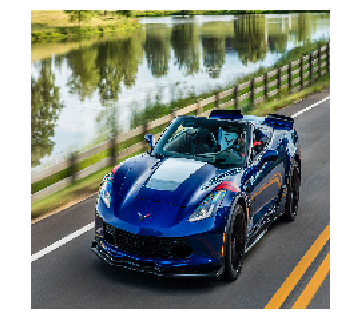

In [39]:
plt.imshow(np.asarray(x, dtype='uint8'))
plt.axis('off')
plt.show()

## Choose a pretrained model

In [0]:
model = ResNet50(weights='imagenet')

## Using the model to classify an image

In [0]:
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

In [42]:
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n04285008', 'sports_car', 0.86264026), ('n04037443', 'racer', 0.08826041), ('n03100240', 'convertible', 0.039198652)]
